# PoS-Taging with Hiden Markov Model (HMM) and Viterb algorithm

## Init

In [ ]:
## Imports
import pandas as pd
import numpy as np
import os

In [ ]:
corpora_path = os.path.realpath('es-corpora/train/')

## Spanish Corpus
* Corpus del Español Actual: http://spanishfn.org/tools/cea/spanish
* Wikicorpus v1.0: https://www.cs.upc.edu/~nlp/wikicorpus/
* Universal POS: https://universaldependencies.org/u/pos/index.html

### Corpus Structure

* Spanish FreeLing part-of-speech tagset overview

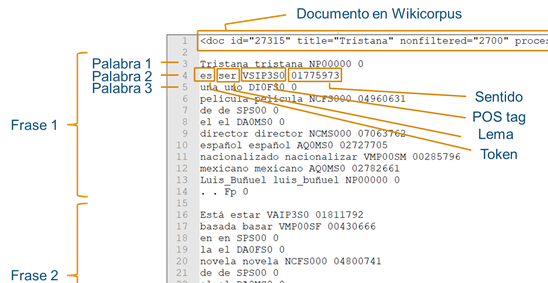

In [ ]:
#Function to create the tagset overview / corpus structure
def tagset_overview():
    '''This function creates a tagset overview based in FreeLing pos-tagset'''
    
    targetset = list()
    adjetive = [{"position":"0","atribute":"category","values":"A:adjective"},{"position":"1","atribute":"type","values":"O:ordinal; Q:qualificative; P:possessive"},{"position":"2","atribute":"degree","values":"S:superlative; V:evaluative"},{"position":"3","atribute":"gen","values":"F:feminine; M:masculine; C:common"},{"position":"4","atribute":"num","values":"S:singular; P:plural; N:invariable"},{"position":"5","atribute":"possessorpers","values":"1:1; 2:2; 3:3"},{"position":"6","atribute":"possessornum","values":"S:singular; P:plural; N:invariable"}]
    conjuntion=[{"position":"0","atribute":"category","values":"C:conjunction"},{"position":"1","atribute":"type","values":"C:coordinating; S:subordinating"}]
    determiner=[{"position":"0","atribute":"category","values":"D:determiner"},{"position":"1","atribute":"type","values":"A:article; D:demonstrative; I:indefinite; P:possessive; T:interrogative; E:exclamative"},{"position":"2","atribute":"person","values":"1:1; 2:2; 3:3"},{"position":"3","atribute":"gen","values":"F:feminine; M:masculine; C:common"},{"position":"4","atribute":"num","values":"S:singular; P:plural; N:invariable"},{"position":"5","atribute":"possessornum","values":"S:singular; P:plural; N:invariable"}]
    noun=[{"position":"0","atribute":"category","values":"N:noun"},{"position":"1","atribute":"type","values":"C:common; P:proper"},{"position":"2","atribute":"gen","values":"F:feminine; M:masculine; C:common"},{"position":"3","atribute":"num","values":"S:singular; P:plural; N:invariable"},{"position":"4","atribute":"neclass","values":"S:person; G:location; O:organization; V:other"},{"position":"5","atribute":"nesubclass","values":"Not used"},{"position":"6","atribute":"degree","values":"V:evaluative"}]
    pronoun=[{"position":"0","atribute":"category","values":"P:pronoun"},{"position":"1","atribute":"type","values":"D:demonstrative;   E:exclamative;   I:indefinite;   P:personal;   R:relative;   T:interrogative"},{"position":"2","atribute":"person","values":"1:1;   2:2;   3:3"},{"position":"3","atribute":"gen","values":"F:feminine;   M:masculine;   C:common"},{"position":"4","atribute":"num","values":"S:singular;   P:plural;   N:invariable"},{"position":"5","atribute":"case","values":"N:nominative;   A:accusative;   D:dative;   O:oblique"},{"position":"6","atribute":"polite","values":"P:yes"}]
    adverb=[{"position":"0","atribute":"category","values":"R:adverb"},{"position":"1","atribute":"type","values":"N:negative;   G:general"}]
    adposition=[{"position":"0","atribute":"category","values":"S:adposition"},{"position":"1","atribute":"type","values":"P:preposition"}]
    verb=[{"position":"0","atribute":"category","values":"V:verb"},{"position":"1","atribute":"type","values":"M:main;   A:auxiliary;   S:semiauxiliary"},{"position":"2","atribute":"mood","values":"I:indicative;   S:subjunctive;   M:imperative;   P:participle;   G:gerund;   N:infinitive"},{"position":"3","atribute":"tense","values":"P:present;   I:imperfect;   F:future;   S:past;   C:conditional"},{"position":"4","atribute":"person","values":"1:1;   2:2;   3:3"},{"position":"5","atribute":"num","values":"S:singular;   P:plural"},{"position":"6","atribute":"gen","values":"F:feminine;   M:masculine;   C:common"}]
    number=[{"position":"0","atribute":"category","values":"Z:number"},{"position":"1","atribute":"type","values":"d:partitive;   m:currency;   p:percentage;   u:unit"}]
    date=[{"position":"0","atribute":"category","values":"W:date"}]
    interjection=[{"position":"0","atribute":"category","values":"I:interjection"}]
    punctuation=[{"tag":"Fd","attributes":"pos:punctuation;   type:colon"},{"tag":"Fc","attributes":"pos:punctuation;   type:comma"},{"tag":"Flt","attributes":"pos:punctuation;  type:curlybracket;   punctenclose:close"},{"tag":"Fla","attributes":"pos:punctuation;  type:curlybracket;   punctenclose:open"},{"tag":"Fs","attributes":"pos:punctuation;   type:etc"},{"tag":"Fat","attributes":"pos:punctuation;  type:exclamationmark;   punctenclose:close"},{"tag":"Faa","attributes":"pos:punctuation;  type:exclamationmark;   punctenclose:open"},{"tag":"Fg","attributes":"pos:punctuation;   type:hyphen"},{"tag":"Fz","attributes":"pos:punctuation;   type:other"},{"tag":"Fpt","attributes":"pos:punctuation;  type:parenthesis;   punctenclose:close"},{"tag":"Fpa","attributes":"pos:punctuation;  type:parenthesis;   punctenclose:open"},{"tag":"Ft","attributes":"pos:punctuation;   type:percentage"},{"tag":"Fp","attributes":"pos:punctuation;   type:period"},{"tag":"Fit","attributes":"pos:punctuation;  type:questionmark;   punctenclose:close"},{"tag":"Fia","attributes":"pos:punctuation;  type:questionmark;   punctenclose:open"},{"tag":"Fe","attributes":"pos:punctuation;   type:quotation"},{"tag":"Frc","attributes":"pos:punctuation;  type:quotation;   punctenclose:close"},{"tag":"Fra","attributes":"pos:punctuation;  type:quotation;   punctenclose:open"},{"tag":"Fx","attributes":"pos:punctuation;   type:semicolon"},{"tag":"Fh","attributes":"pos:punctuation;   type:slash"},{"tag":"Fct","attributes":"pos:punctuation;  type:squarebracket;   punctenclose:close"},{"tag":"Fca","attributes":"pos:punctuation;  type:squarebracket;   punctenclose:open"}]

    targetset.append(adjetive)
    targetset.append(conjuntion)
    targetset.append(determiner)
    targetset.append(noun)
    targetset.append(pronoun)
    targetset.append(adverb)
    targetset.append(adposition)
    targetset.append(verb)
    targetset.append(number)
    targetset.append(date)
    targetset.append(interjection)
    targetset.append(punctuation)

    # Add group and category columns
    for lista in targetset:
        categoria_dict=lista[0]
        grupo=""
        categoria=""

        if("values" in categoria_dict):
            grupo = categoria_dict["values"]
            categoria = grupo.split(":")[0]
        else:
            grupo = "F:punctuation"
            categoria = "F"

        for dictionario in lista:
            dictionario["group"] = grupo
            dictionario["category"] = categoria
            
    # Create the dataframe
    df = pd.DataFrame()

    # Add the list of tagsets in dataframe
    for lista in targetset:
        df = df.append(pd.DataFrame(lista))

    # df = df.reset_index()
    
    return df

In [ ]:
#Create the tagset overview
postag_df = tagset_overview()

postag_df.head(10)

### Manipulating and parsing the corpus

In [ ]:
# Create dataframe function
def create_df(filename: str, encoding='ISO-8859-1') -> pd.DataFrame:
    '''This function creates a pandas dataframe based in wikicorpus'''
    
    data = pd.read_csv(corpora_path +  f"/{filename}.txt", sep="\n", 
                      skip_blank_lines=False, dtype=str, encoding=encoding, skiprows=1, names=['col'])
    
    new = data["col"].str.split(" ", n = 3, expand = True)
    data["token"]= new[0]
    data["lemma"]= new[1]
    data["pos_tag"]= new[2]
    data["sense"]= new[3]
    data.drop(columns =["col"], inplace = True)
    
    # Drop undeseable rows
    data.drop(data[data['token'] == '</doc>' ].index, inplace = True)
    data.drop(data[data['token'] == '<doc' ].index, inplace = True)
    data.reset_index(drop=True, inplace=True)
    
    # Convert all objects to string
    data = data.astype(str)
    
    # After converting the txt to csv dataframe, the token " was interpreted as empty string, so let solve this 
    data.at[data.query("token == '' and pos_tag == 'Fe' and sense == '0'").index, ['token', 'lemma']] = '"'
    
    # Set empty string to all blank line
    data.at[data.query("token == lemma == pos_tag == sense == 'nan' ").index, [*data.columns]] = ""
    
    return data

In [ ]:
def add_features(df: pd.DataFrame) -> pd.DataFrame:
    ''' '''
    
    df['token'] = df['token'].apply(lambda token: ' '.join(token.split('_')))
    df['lemma'] = df['lemma'].apply(lambda lemma: ' '.join(lemma.split('_')))
    df['tag'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[:2])
    df['emission'] = df[['token', 'pos_tag']].apply(lambda token_tag: token_tag.values[0] + '|' + token_tag.values[1][:2], axis=1)
    
    df['transition'] = df['tag'] + '|' + df['tag'].shift(1)
    df.loc[0, 'transition'] = df.loc[0, 'tag'] + '|'
    
    df['category'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[:1])
    df['type'] = df['pos_tag'].apply(lambda pos_tag: np.nan if pos_tag.capitalize().startswith(('W', 'I', 'F')) else pos_tag[1:2])

    df['person'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[2:3] if pos_tag.capitalize().startswith(('D', 'P')) 
                                    else ( pos_tag[4:5] if pos_tag.capitalize().startswith('V') else  np.nan))

    df['degree'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[2:3] if pos_tag.capitalize().startswith('A') 
                                    else ( pos_tag[6:7] if pos_tag.capitalize().startswith('N') else  np.nan))

    df['mood'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[2:3] if pos_tag.capitalize().startswith('V') else np.nan)
    df['tense'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[3:4] if pos_tag.capitalize().startswith('V') else np.nan)

    df['gen'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[3:4] if pos_tag.capitalize().startswith(('A', 'D', 'P')) 
                                    else ( pos_tag[2:3] if pos_tag.capitalize().startswith('N')
                                            else (pos_tag[6:7] if pos_tag.capitalize().startswith('V') else  np.nan)))

    df['num'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[4:5] if pos_tag.capitalize().startswith(('A', 'D', 'P')) 
                                    else ( pos_tag[3:4] if pos_tag.capitalize().startswith('N')
                                            else (pos_tag[5:6] if pos_tag.capitalize().startswith('V') else  np.nan)))

    df['class'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[4:5] if pos_tag.capitalize().startswith('N') 
                                    else ( pos_tag[2:3] if pos_tag.capitalize().startswith('S') else  np.nan))

    df['subclass'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[5:6] if pos_tag.capitalize().startswith('N') 
                                    else ( pos_tag[3:4] if pos_tag.capitalize().startswith('S') else  np.nan))

    df['case'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[5:6] if pos_tag.capitalize().startswith('P') else  np.nan)
    df['polite'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[6:7] if pos_tag.capitalize().startswith('P') else  np.nan)
    df['possessorpers'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[5:6] if pos_tag.capitalize().startswith(('A', 'D')) else  np.nan)
    df['possessornum'] = df['pos_tag'].apply(lambda pos_tag: pos_tag[6:7] if pos_tag.capitalize().startswith('A') else  np.nan)
    
    
    
    return df

In [ ]:
# Unzip the file
import zipfile

if not os.path.isfile(corpora_path + '/spanish_tagged_57.txt'):
    with zipfile.ZipFile(corpora_path + '/spanish_tagged_57.zip') as zip_file:
        zip_file.extractall(corpora_path)

In [ ]:
filename = 'spanish_tagged_57'
df = create_df(filename)

In [ ]:
df.head()

In [ ]:
add_features(df)

In [ ]:
df.head()

In [ ]:
# After add some features in dataframe, the blank line that represent 
# the end end start of an sentence need to be cleaned again
# So as we will begin with counting, the best option is put all '' as np.nan
df.at[df.query(" token == lemma == pos_tag == sense == '' ").index, [*df.columns]] = np.nan
df.replace('', np.nan, inplace=True)
df.replace('nan', np.nan, inplace=True)
df.replace('NaN', np.nan, inplace=True)
df.head()

In [ ]:
# Save the dataframe as a csv file
# if not os.path.isfile(corpora_path + '/spanish_tagged_57.csv'):
#     df.to_csv(corpora_path + '/spanish_tagged_57.csv')

## Hiden Markov Model (HMM) - Training the Model

### Counting Calculation

* tags (tags) `tagCountDict`: $C(tag)$
* emisiones (word|tag) `emissionProbDict`: $C(word|tag)$
* transiciones (tag|prevtag) `transitionDict`: $C(tag|prevtag)$

In [ ]:
tagCountDict = dict(zip(df['tag'].value_counts().index, df['tag'].value_counts().values))
emissionDict = dict(zip(df['emission'].value_counts().index, df['emission'].value_counts().values))
transitionDict = dict(zip(df['transition'].value_counts().index, df['transition'].value_counts().values))

In [ ]:
emissionDict

In [ ]:
transitionDict

### Probalility Calculation

* probabilidades de transición:
$$P(tag|prevtag) = \frac{C(prevtag, tag)}{C(prevtag)}$$

* probabilidades de emisión:
 $$P(word|tag) = \frac{C(word|tag)}{C(tag)}$$

In [ ]:
transitionProbDict = {} # matriz A
emissionProbDict = {} # matriz B

# transition Probabilities 
for key in transitionDict.keys():
  prevtag = key.split('|')[-1]
  # Coz the first element will not have a previous tag (prevtag) we need prevent a KeyError bug
  if prevtag != '': 
    transitionProbDict[key] = transitionDict[key]/(tagCountDict[prevtag])

# emission Probabilities 
for key in emissionDict.keys():
  tag = key.split('|')[-1]
  emissionProbDict[key] = emissionDict[key]/tagCountDict[tag]


In [ ]:
transitionProbDict

In [ ]:
emissionProbDict

### Save the params

In [ ]:
# Save the params
models_path = os.path.realpath('models')
if not os.path.isdir(models_path):
    os.mkdir(models_path) 
    
if not os.path.isfile(models_path + '/transitionHMM.npy'):
    np.save(models_path + '/transitionHMM.npy', transitionProbDict)
    
if not os.path.isfile(models_path + '/emissionHMM.npy'): 
    np.save(models_path + '/emissionHMM.npy', emissionProbDict)

## Viterbi - Decode

* Given a sentence Viterb Algorith find the best grammatical category for each word of sentence, calculating the best pathway in the Viterb Matrix using conditional probability. 

### Load the HMM Previously Trained

In [ ]:
# Load the HMM Transition and Emission Probability
transitionProbdict = np.load(models_path + '/transitionHMM.npy', allow_pickle='TRUE').item()
emissionProbdict = np.load(models_path + '/emissionHMM.npy', allow_pickle='TRUE').item()

In [ ]:
# Get the grammatical Categories present in corpus
state_set = set([e.split('|')[-1] for e in emissionProbDict.keys()]) 

In [ ]:
# Indexing the state_set to identify it in the Viterbi Matrix
state_set_indexed = dict()
for i, pos in enumerate(state_set):
    state_set_indexed[pos] = i
state_set_indexed

### Initial Distribution of Latent States

In [ ]:
# Create dataframe function
def create_dataframe(filename: str, encoding='ISO-8859-1') -> pd.DataFrame:
    '''This function creates a pandas dataframe based in wikicorpus'''
    
    # Load txt file with numpy
    # The enconding depends on the file/dataset
    Data = np.genfromtxt(corpora_path +  f"/{filename}.txt", dtype=str, invalid_raise=False,
                     encoding=encoding, comments='<doc')
    
    # Create dataframe with numpy array
    columns = ['token', 'lemma', 'pos_tag',	'sense']
    df = pd.DataFrame(Data, columns=columns)
    
    return df

In [ ]:
df.loc[pd.isna(df['token'])].index.values

Calculating the initial distribution of states

Initial States are the first words in each sentence on corpus
By the structure of corpus, the a paragraph init after a blank/empty line, so we need to process this

In [ ]:
# In this point we have NaN representing the blank/empty lines. Lets find out the indexes of those NaN lines and add 1
# In this way we'll have the indexes of the first words of all sentences on the corpus
indexes = np.array(0)
indexes = np.append(indexes, df.loc[pd.isna(df['token'])].index.values + 1)

# Get the first/init words using the indexes of those words
initial_states = df.loc[df.index.intersection(indexes)]
initial_states

In [ ]:
# Calculating the initial distribution of states
# Now lets calculate the Probability that a Tag appear in the beginning of a sentence

# initial_states['tag'].value_counts()
initial_states_tags_count = initial_states.pivot_table(columns=['tag'], aggfunc='size')

initial_states_tags_count

In [ ]:
initial_states_tags_prob = {}
initial_states_tags_prob = dict(zip(initial_states_tags_count.keys(), initial_states_tags_count.values / initial_states.shape[0]))
initial_states_tags_prob

In [ ]:
# The sum of all probability should be 1
print(sum(initial_states_tags_prob.values()))
print(np.array(list(initial_states_tags_prob.values())).sum())

### Building the Viterbi algorithm

Given a sequence of words $\{w_1, w_2, \dots, w_n \}$, and a set of grammatical category (we use `FreeLing convection`, but the next matrix is represented with `UPoS convection` ), the Viterbi Matrix will be given by:

$$
\begin{array}{c c}
\begin{array}{c c c c}
\text{ADJ} \\
\text{ADV}\\
\text{PRON} \\
\vdots \\
{}
\end{array} 
&
\left[
\begin{array}{c c c c}
\nu_1(\text{ADJ}) & \nu_2(\text{ADJ}) & \dots  & \nu_n(\text{ADJ})\\
\nu_1(\text{ADV}) & \nu_2(\text{ADV}) & \dots  & \nu_n(\text{ADV})\\ 
\nu_1(\text{PRON}) & \nu_2(\text{PRON}) & \dots  & \nu_n(\text{PRON})\\
\vdots & \vdots & \dots & \vdots \\ \hdashline
w_1 & w_2 & \dots & w_n 
\end{array}
\right] 
\end{array}
$$

Where the probabilities of the first column (for one category $i$) are given by: 

$$
\nu_1(i) = \underbrace{\rho_i^{(0)}}_{\text{initial probability}} \times \underbrace{P(w_1 \vert i)}_{\text{emission}}
$$

then, for he second column (geven a category $j$) will be: 

$$
\nu_2(j) = \max_i \{ \nu_1(i) \times \underbrace{P(j \vert i)}_{\text{transition}} \times \underbrace{P(w_2 \vert j)}_{\text{emission}} \}
$$

so, in geneal, the probabilities for the column $t$ will be given by: 

$$
\nu_{t}(j) = \max_i \{ \overbrace{\nu_{t-1}(i)}^{\text{previous state}} \times \underbrace{P(j \vert i)}_{\text{transition}} \times \underbrace{P(w_t \vert j)}_{\text{emission}} \}
$$

In [ ]:
from nltk import word_tokenize

In [ ]:
def viterbi_matrix(token_sequence, transitionProbDict=transitionProbDict, emissionProbDict=emissionProbDict,
                   state_set_indexed=state_set_indexed, initial_states_tags_prob=initial_states_tags_prob):
    
    # Building the Viterbi Matrix
    viterbi_prob_matrix = np.zeros((len(state_set), len(token_sequence)))
    
    ## First Column initialization
    for tag in state_set_indexed.keys():
        tag_row = state_set_indexed[tag]
        word_tag = token_sequence[0].lower() + '|' + tag
        # We just consider the tags that are initial state
        if tag in initial_states_tags_prob.keys():
            if word_tag in emissionProbDict.keys():
                viterbi_prob_matrix[tag_row, 0] = initial_states_tags_prob[tag] * emissionProbDict[word_tag]
            
    ## Calculate the probabilities for the next columns
    for column in range(1, len(token_sequence)):
        for actual_tag in state_set_indexed.keys():
            actualtag_row = state_set_indexed[actual_tag]
            word_tag = token_sequence[column].lower() + '|' + actual_tag
            if word_tag in emissionProbDict.keys():
                possible_probs = []
                ### Previous States
                for prev_tag in state_set_indexed.keys():
                    prev_tag_row = state_set_indexed[prev_tag]
                    if viterbi_prob_matrix[prev_tag_row, column - 1] > 0:
                        previous_state_prob = viterbi_prob_matrix[prev_tag_row, column - 1]
                        actualtag_prevtag = actual_tag + '|' + prev_tag
                        if actualtag_prevtag in transitionProbDict.keys():
                            possible_probs.append(
                                previous_state_prob * transitionProbDict[actualtag_prevtag] * emissionProbDict[word_tag]
                            )
                viterbi_prob_matrix[actualtag_row, column] = max(possible_probs) 

    return viterbi_prob_matrix

In [ ]:
# Get the Tag sequence

def viterbi_pos_tag(sentence, transitionProbDict=transitionProbDict, emissionProbDict=emissionProbDict,
                   state_set_indexed=state_set_indexed, initial_states_tags_prob=initial_states_tags_prob):
    
    token_sequence = word_tokenize(sentence)
    
    # Building the Viterbi Matrix
    viterbi_prob_matrix = viterbi_matrix(token_sequence=token_sequence)

    # Get the Tag sequence
    PoS = []
    for column, token in enumerate(token_sequence):
        column_max_prob = np.argmax(viterbi_prob_matrix[:, column])
        notfound = True
        for tag in state_set_indexed.keys():
            if state_set_indexed[tag] == column_max_prob and column_max_prob > 0:
                PoS.append((token, tag))
                notfound = False
                break
        if notfound:
            PoS.append((token, None))
            
    return PoS

In [ ]:
viterbi_pos_tag('Ella estaba caminando sola')